In [1]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav 

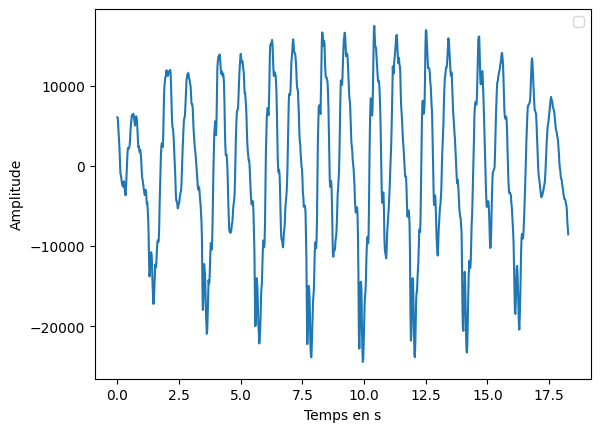

In [3]:
# I-Paramétrisationsspectrale et cepstrale
fs, signal = wav.read('L1.wav')
T = signal.shape[0]/fs
data = signal[27800:28824]
t = np.linspace(0,T,data.shape[0])
plt.plot(t,data)
plt.legend()
plt.xlabel("Temps en s")
plt.ylabel("Amplitude")
plt.show()

[0.000e+00 1.000e+00 2.000e+00 ... 1.021e+03 1.022e+03 1.023e+03]


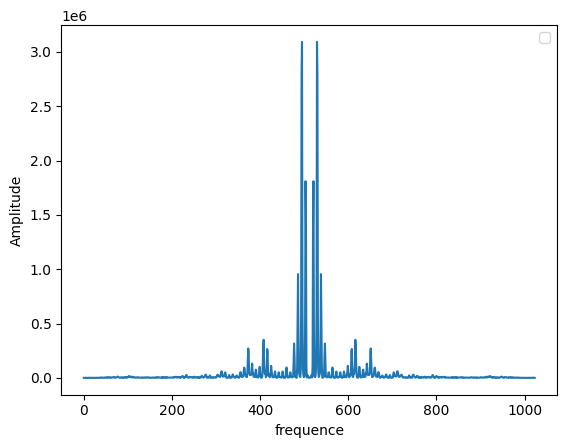

In [4]:
#fenetre de hamming sur le signal
hamming = np.hamming(1024)
signalHamming = data * hamming
# calculer le spectre du signal fenetre
spectre = np.fft.fft(signalHamming)
spectreAbs = np.abs(np.fft.fftshift(spectre))
#print(len(spectreAbs))
#freq = np.fft.fftfreq(1024) si on veut la version normalise 
freq = np.linspace(0,1023,1024)
print(freq)
plt.plot(freq,spectreAbs)
plt.legend()
plt.xlabel("frequence")
plt.ylabel("Amplitude")
plt.show()

In [12]:
from math import *
def energie(signal, taille):
    recouvrement = floor(taille/2)
    nbfen = floor((np.size(signal) - taille) / recouvrement) + 1
    energie = np.zeros(nbfen)
    for fen in range(nbfen):
        idebut = fen * recouvrement
        energie[fen] = np.sum((signal[idebut:idebut + taille])**2) / taille

    return energie

In [13]:
energie = energie(signal,64)
print(energie)

[5693.921875 3011.78125  4136.6875   ... 4073.890625 3813.84375
 3898.765625]


In [14]:
def zcr(signal, taille):
    recouvrement = floor(taille/2)
    nb_fen = floor((np.size(signal) - taille) / recouvrement) + 1
    zcr = np.zeros(nb_fen)
    for fen in range(nb_fen):
        idebut = fen * recouvrement
        res = 0
        for i in range(idebut+1, idebut+taille):
            res += abs(np.sign(signal[i]) - np.sign(signal[i-1]))
        zcr[fen] = res / (2*taille)

    return zcr

In [15]:
zcr = zcr(signal,64)
print(zcr)

[0.453125 0.5      0.484375 ... 0.296875 0.328125 0.46875 ]


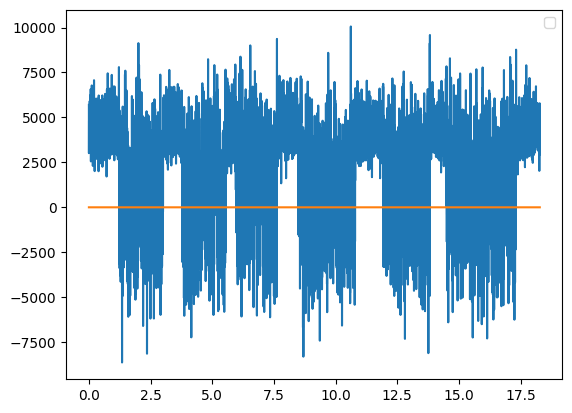

In [30]:
taille = 64
recouvrement = floor(taille/2)
nbfen = floor((np.size(signal) - taille) / recouvrement) + 1
x= np.linspace(0,len(signal)/fs,nbfen)
plt.plot(x,energie,)
plt.plot(x,zcr,)
plt.legend()
plt.show()

In [31]:
#spectrogramme
def spectro(signal, taille):
    recouvrement = floor(taille/2)
    nbfen = floor((np.size(signal) - taille) / recouvrement) + 1
    res = np.zeros((recouvrement, nbfen))

    # Calcul de l'énergie
    for fen in range(nbfen):
        idebut = fen * recouvrement
        spectre = abs(np.fft.fft(signal[idebut:idebut+taille]))
        res[:, fen] = spectre[:recouvrement].T

    return res

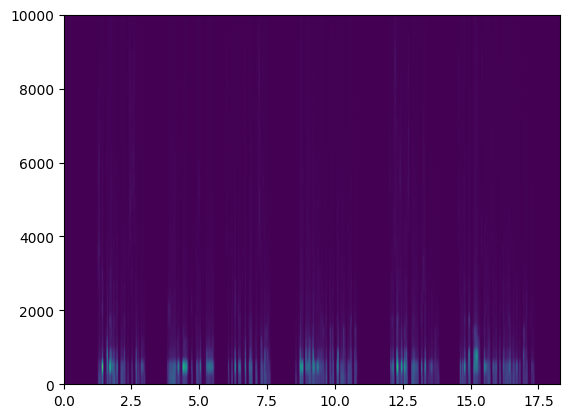

In [38]:
spect = spectro(signal,64)
plt.imshow(spect, extent=[0, len(signal)/fs, 0, fs/2], aspect="auto", origin="lower")

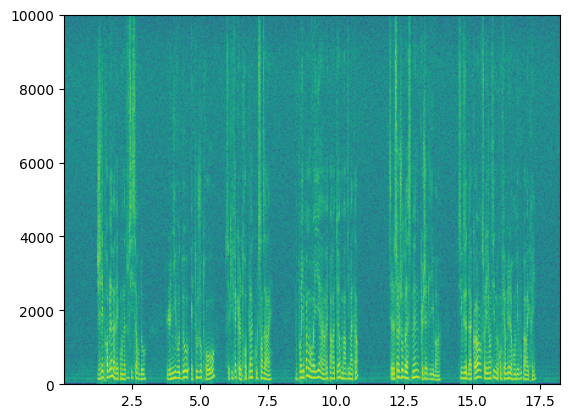

In [39]:
plt.specgram(signal, Fs=fs, window=np.hamming(1024), NFFT=1024)
plt.show()